<a href="https://colab.research.google.com/github/Surajk86808/ML-code/blob/main/Decesion_Tree_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from sklearn.datasets import load_diabetes
dataset = load_diabetes()
import warnings
warnings.filterwarnings('ignore')

In [7]:
print(dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [9]:
import pandas as pd
df_diabetes = pd.DataFrame(dataset['data'], columns=dataset['feature_names'])
df_diabetes['target'] = dataset['target']
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [11]:
#  independent and dependent features
X = df_diabetes
y = df_diabetes['target']


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
# correlation
ww = X_train.corr()
ww

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.171161,0.184695,0.314569,0.270283,0.218952,-0.043783,0.180038,0.268422,0.281806,0.196510
sex,0.171161,1.000000,0.033934,0.179283,0.021069,0.120205,-0.355094,0.320490,0.113187,0.165951,0.007116
bmi,0.184695,0.033934,1.000000,0.394309,0.266467,0.261560,-0.354655,0.430974,0.468473,0.404928,0.604751
bp,0.314569,0.179283,0.394309,1.000000,0.239978,0.161457,-0.120827,0.212785,0.375295,0.374647,0.444770
s1,0.270283,0.021069,0.266467,0.239978,1.000000,0.891063,0.053003,0.546840,0.528543,0.330773,0.199547
s2,0.218952,0.120205,0.261560,0.161457,0.891063,1.000000,-0.190658,0.654675,0.307139,0.293291,0.154922
s3,-0.043783,-0.355094,-0.354655,-0.120827,0.053003,-0.190658,1.000000,-0.736685,-0.372437,-0.288236,-0.384000
s4,0.180038,0.320490,0.430974,0.212785,0.546840,0.654675,-0.736685,1.000000,0.613472,0.431352,0.425094
s5,0.268422,0.113187,0.468473,0.375295,0.528543,0.307139,-0.372437,0.613472,1.000000,0.478967,0.552183
s6,0.281806,0.165951,0.404928,0.374647,0.330773,0.293291,-0.288236,0.431352,0.478967,1.000000,0.390363


In [23]:
for column in ww:
  if(ww[column].abs().max() > 0.6 and column != 'target'):
    print(f"Correlation of {column} with other features:")
    print(ww[column][ww[column].abs() > 0.6])

Correlation of age with other features:
age    1.0
Name: age, dtype: float64
Correlation of sex with other features:
sex    1.0
Name: sex, dtype: float64
Correlation of bmi with other features:
bmi       1.000000
target    0.604751
Name: bmi, dtype: float64
Correlation of bp with other features:
bp    1.0
Name: bp, dtype: float64
Correlation of s1 with other features:
s1    1.000000
s2    0.891063
Name: s1, dtype: float64
Correlation of s2 with other features:
s1    0.891063
s2    1.000000
s4    0.654675
Name: s2, dtype: float64
Correlation of s3 with other features:
s3    1.000000
s4   -0.736685
Name: s3, dtype: float64
Correlation of s4 with other features:
s2    0.654675
s3   -0.736685
s4    1.000000
s5    0.613472
Name: s4, dtype: float64
Correlation of s5 with other features:
s4    0.613472
s5    1.000000
Name: s5, dtype: float64
Correlation of s6 with other features:
s6    1.0
Name: s6, dtype: float64


<Axes: >

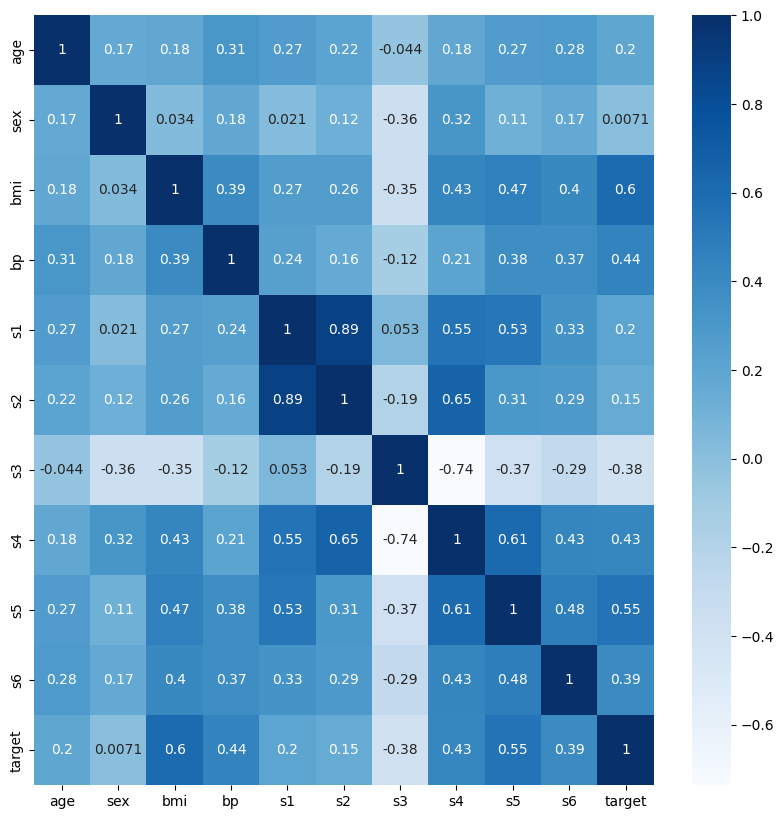

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(X_train.corr(), annot=True, cmap='Blues')


In [25]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train,y_train)
# model.score(X_test,y_test)

DecisionTreeRegressor()

In [27]:
param = {
   'criterion' : ['squared_error','friedman_mse','absolute_error','poisson'],
   'splitter' : ['best','random'],
   'max_depth' : [None,1,2,3,4,5,6,7,8,9,10],
   'max_features' :['auto','sqrt','log2']
}

In [29]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param, cv=5,scoring= 'neg_mean_squared_error')
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [31]:
grid_search.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 10,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [33]:
y_pred = grid_search.predict(X_test)

In [35]:
from sklearn.metrics import  r2_score,mean_absolute_error,mean_squared_error
import numpy as np
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

Mean Absolute Error: 18.397661798801916
Mean Squared Error: 639.5456590885295
